In [6]:
import pandas as pd
import faulthandler
from allib.datasets import load_uci, AVAIL_DATASETS, Dataset
from allib.models import get_pipeline, AVAIL_MODELS
from allib.models.al import ActiveLearningStrategy, ActiveLearningPipeline, get_al_strategy, ALL_STRATEGIES
from allib.metrics import get_metrics
from allib.plots import PLMetric
from allib.utils import make_seeds, ensure_path
from preprocess import process_dataset
import os
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [3]:
_ppl = get_pipeline("svm")
dataset = load_uci("iris")
dataset = dataset.with_strategy(get_al_strategy("random"))
ppl = _ppl(dataset=dataset, model=None, n_times=10, seeds=[i for i in range(10)], eval_metrics=get_metrics(["accuracy"]))
ppl.start()

  0%|          | 0/10 [00:00<?, ?it/s]

In [4]:
import numpy as np

In [7]:
d = np.random.random((5, 10, 3))

In [10]:
res = d.argmax(axis=-1).T
nv = res.shape[-1]

In [16]:
a = d[0]
from scipy.spatial.distance import cosine, euclidean
from sklearn.metrics.pairwise import pairwise_distances

In [17]:
a

array([[0.39031309, 0.40044788, 0.38401105],
       [0.69233521, 0.99902319, 0.86530197],
       [0.65366077, 0.43676566, 0.53149043],
       [0.01595777, 0.36436973, 0.95943041],
       [0.5027634 , 0.58042174, 0.34301491],
       [0.71221275, 0.07036863, 0.599481  ],
       [0.99164365, 0.40327949, 0.6159703 ],
       [0.82437419, 0.25416359, 0.33884943],
       [0.8122739 , 0.82082358, 0.39186727],
       [0.83960789, 0.54839786, 0.19925043]])

In [22]:
ad = load_uci("adult")

In [24]:
ad.info["cat_idx"]

[1, 3, 5, 6, 7, 8, 9, 13, 14]

In [29]:
ad = ad.with_strategy(strategy=ALL_STRATEGIES["random"])

In [32]:
_ppl = get_pipeline("catboost")
ppl = _ppl(dataset=ad, model=None, n_times=1, seeds=[i for i in range(1)], eval_metrics=get_metrics(["accuracy"]), cat_idx=ad.info["cat_idx"])
ppl.start()

  0%|          | 0/1 [00:00<?, ?it/s]

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=1]=" Private": Cannot convert 'b' Private'' to float

In [36]:
from catboost import CatBoostClassifier
c = CatBoostClassifier(verbose=False, **{
    "iterations": 5,
    "learning_rate": 0.1,
    "cat_features": ad.info["cat_idx"]
})

In [38]:
c.fit(ad._data, ad._label, cat_features=ad.info["cat_idx"])

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=1]=" State-gov": Cannot convert 'b' State-gov'' to float

In [42]:
al_strategies =[
    "random",
    "uncertain",
    "disagreement",
    "ranked_batch",
    "information_density"
]

al_confs = [
    [{}],
    # [{"name": name} for name in ["uncertainty", "margin", "entropy"]],
    # [{"name": name} for name in ["vote", "consensus", "max_disagreement"]],
    # # todo
    # [{"dist_metric": metric} for metric in ["cosine", "euclidean"]],
    # [{"similarity_metric": metric} for metric in ["cosine", "euclidean"]]
]

In [44]:
from allib.plots import PLMetric
import pickle
import numpy as np

dataset_name="letter-recognition"
model_name="random_forest"
metrics_n_times = []
instances = []
strategies = []

plot_name = f"{dataset_name}@{model_name}.png"
for idx, confs in enumerate(al_confs):
    for cid, conf in enumerate(confs):
        stats = None
        cache_name = f"{dataset_name}@{model_name}@{al_strategies[idx]}_{cid}@x20.pkl"
        if not os.path.isfile(os.path.join("ppl_cache", cache_name)):
            continue
        with open(os.path.join("ppl_cache", cache_name), "rb") as f:
            stats = pickle.load(f)
        with open("temp.pkl", "wb") as f:
            for stat in stats:
                del stat["model_snapshots"]
            pickle.dump(stats, f)
        # print(",".join([str(stats[i]["seed"]) for i in range(len(stats))]))
        # metrics_n_times.append([stats[i]["accuracy"] for i in range(len(stats))])
        # strategies.append(f"{al_strategies[idx]}{('(' + list(conf.values())[0] + ')') if conf else ''}")
        # instances = stats[0]["instances"]
# pl_metric = PLMetric()
# pl_metric.plot("Accuracy", instances, np.array(metrics_n_times), strategies, plot_name=plot_name)

In [4]:
from scipy.stats import entropy
entropy([1,2,3])

1.0114042647073518

In [9]:
import numpy as np
from sklearn.decomposition import PCA

In [3]:
iris = load_uci("iris")

In [4]:
data,label = iris._data, iris._label

In [5]:
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

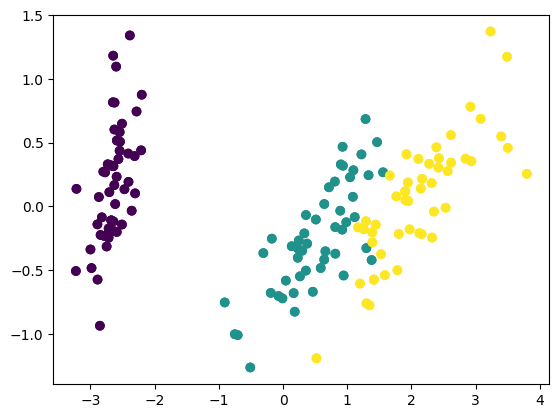

In [16]:
fitted = pca.fit_transform(data)
x1, x2 = fitted[:, 0], fitted[:, 1]
plt.scatter(x1, x2, c=label.label.astype("category").cat.codes)

In [2]:
adult = load_uci("adult")

In [3]:
data, label = adult._data, adult._label

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
one_hot = OneHotEncoder()
one_hot.fit(data)

OneHotEncoder()

In [4]:
pd.get_dummies(data).astype(float)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
data = data[data.apply(lambda row: any(row != "?"), axis=1)]
data = pd.get_dummies(data).astype(float)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam
14,40.0,121772.0,11.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,54.0,180211.0,10.0,0.0,0.0,60.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38,31.0,84154.0,10.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,18.0,226956.0,9.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,32.0,293936.0,4.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35.0,320084.0,13.0,0.0,0.0,55.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32531,30.0,33811.0,13.0,0.0,0.0,99.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32539,71.0,287372.0,16.0,0.0,0.0,10.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32541,41.0,202822.0,9.0,0.0,0.0,32.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
pca = PCA(n_components=2)
pca.fit(data)
new_data = pd.DataFrame(pca.fit_transform(data), columns=["x1", "x2"])
new_data

,x1,x2
0,-67811.925699,-894.604932
1,-9372.926011,-896.679918
2,-105429.925466,-893.267996
3,37372.074315,-898.353209
4,104352.073954,-900.733494
...,...,...
2394,130500.073875,-901.661372
2395,-155772.925143,-891.469130
2396,97788.073296,-900.496469
2397,13238.074043,-897.490231


In [25]:
from preprocess import process_dataset
ad = load_uci("adult")
ad = process_dataset(ad)
ad = ad.with_strategy(get_al_strategy("uncertain"), {"name": "uncertainty"})
_svm = get_pipeline("svm")
svm = _svm(model=None, eval_metrics=get_metrics(["accuracy"]), n_times=20, dataset=ad)

In [28]:
t = svm.model_maker()
t.fit(ad._data, ad._label)

D:\anaconda3\envs\COMP8800\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [39]:
d = {"A": 1}

In [40]:
del d["A"]

In [41]:
d

{}

In [2]:
import os.path
import pickle
from typing import Type

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import faulthandler
from allib.datasets import load_uci, AVAIL_DATASETS, Dataset
from allib.models import get_pipeline, AVAIL_MODELS
from allib.models.al import ActiveLearningStrategy, ActiveLearningPipeline, get_al_strategy, ALL_STRATEGIES
from allib.metrics import get_metrics
from allib.plots import PLMetric
from allib.utils import make_seeds, ensure_path
from preprocess import process_dataset, load_datasets


DS_CACHE = "processed_datasets"

# ---------------- MODEL ---------------
cat_models = [
    "catboost",
]
all_models = [
    # "logistic",
    # "mlp",
    "random_forest",
    "svm",
    *cat_models
]
model_dict = {
    name: get_pipeline(name) for name in all_models
}

# ---------------- DATASET ---------------
# all_datasets = list(AVAIL_DATASETS.keys())
all_preprocesses = [
    "continuous_to_categorical"
    "pca_3",
    # "pca_2",
    # "origin"
]
all_datasets = [f"{ds}/{pps}" for ds in AVAIL_DATASETS.keys() for pps in all_preprocesses]

origin_dataset_dict = {
    name: load_uci(name) for name in AVAIL_DATASETS.keys()
}

dataset_dict = load_datasets(origin_dataset_dict)

# ---------------- STRATEGY ---------------
cat_strategies = [
    "random",
    "uncertain",
    "disagreement",
]

al_strategies =[
    *cat_strategies,
    "ranked_batch",
    "information_density",
    "gsx"
]

cat_confs = [
    [{}],
    [{"name": name} for name in ["uncertainty", "margin", "entropy"]],
    [{"name": name} for name in ["vote", "consensus", "max_disagreement"]],
]
al_confs = [
    *cat_confs,
    # todo
    [{"dist_metric": metric} for metric in ["cosine", "euclidean"]],
    [{"similarity_metric": metric} for metric in ["cosine", "euclidean"]],
    [{}]
]


def run_pipeline(dataset_name: str, model_name: str):
    origin_dataset = dataset_dict[dataset_name]
    avail_strategies = al_strategies
    avail_confs = al_confs
    if origin_dataset.info["cat_idx"] and len(origin_dataset.info["cat_idx"]) != 0:
        avail_strategies = cat_strategies
        avail_confs = cat_confs
    for idx, confs in enumerate(avail_confs):
        for cid, conf in enumerate(confs):
            cache_name = f"{dataset_name.replace('/', '_')}@{model_name}@{avail_strategies[idx]}_{cid}@x20.pkl"
            print(f"[PPL]: Checking {cache_name} ... ", end="")
            if os.path.isfile(os.path.join("ppl_cache", cache_name)):
                print(f" exists.")
                # continue
            else:
                strategy = get_al_strategy(avail_strategies[idx])
                if avail_strategies[idx] == "disagreement":
                    conf["make_model"] = AVAIL_MODELS[model_name]._model_maker
                dataset = origin_dataset.with_strategy(strategy, conf)
                make_ppl: Type[ActiveLearningPipeline] = model_dict[model_name]
                print(f"\nTraining pipeline: {model_name}; Dataset: {dataset_name}; AL Strategy: {avail_strategies[idx]}...")
                ppl = make_ppl(
                    model=None,
                    eval_metrics=get_metrics(["accuracy"]),
                    seeds=[i for i in range(20)],
                    n_times=20,
                    dataset=dataset,
                    cat_idx=dataset.info["cat_idx"]
                )
                ppl.start()
                with open(os.path.join("ppl_cache", cache_name), "wb") as f:
                    pickle.dump(ppl.stats, f)


def plot(dataset_name: str, model_name: str):
    print(f"[PLOT] Plotting result of {model_name} on {dataset_name}...")
    metrics_n_times = []
    instances = []
    strategies = []
    plot_name = f"{dataset_name.replace('/', '_')}@{model_name}.png"
    for idx, confs in enumerate(al_confs):
        for cid, conf in enumerate(confs):
            stats = None
            cache_name = f"{dataset_name.replace('/', '_')}@{model_name}@{al_strategies[idx]}_{cid}@x20.pkl"
            if not os.path.isfile(os.path.join("ppl_cache", cache_name)):
                continue
            with open(os.path.join("ppl_cache", cache_name), "rb") as f:
                stats = pickle.load(f)
            metrics_n_times.append([stats[i]["accuracy"] for i in range(len(stats))])
            strategies.append(f"{al_strategies[idx]}{('(' + list(conf.values())[0] + ')') if conf else ''}")
            instances = stats[0]["instances"]
    pl_metric = PLMetric()
    pl_metric.plot("Accuracy", instances, np.array(metrics_n_times), strategies, plot_name=plot_name)
    # pl_metric = PLMetric("Accuracy", instances, metrics_n_times, strategies, plot_name=plot_name)


def dataset_distribution(dataset_name: str):
    dataset = dataset_dict[dataset_name]
    title = f"Distribution of dataset {dataset_name}"
    fig, ax = plt.subplots(figsize=(10, 10))
    x1, x2 = dataset._data.x1, dataset._data.x2
    label = dataset._label
    ax.scatter(x1, x2, c=label.label.astype("category").cat.codes)
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    fig.savefig(f"plots/datasets/{dataset_name.replace('/', '_')}_pca_2.png")
    plt.close(fig)


def dataset_3d(dataset_name):
    dataset = dataset_dict[dataset_name]
    title = f"Distribution of dataset {dataset_name}"
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    data, label = dataset._data, dataset._label
    ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:,2], c=label.label.astype("category").cat.codes)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    fig.savefig(f"plots/datasets/pca_3/{dataset_name.replace('/', '_')}_pca_3.png")
    plt.close(fig)


if __name__ == "__main__":
    faulthandler.enable()
    for dsn, dataset in dataset_dict.items():
        # if dsn.endswith("pca_3"):
        #     dataset_3d(dsn)
        #     
        avail_models = all_models
        if dataset.info["cat_idx"] and len(dataset.info["cat_idx"]) != 0:
            print("[MAIN] Checkout to cat models")
            avail_models = cat_models
        for mdn in avail_models:
            # run_pipeline(dsn, mdn)
            try:
                plot(dsn, mdn)
            except Exception as e:
                print(f"[PLOT] Exception when plotting {mdn} on {dsn}: {e}")

[DATASET]: loading exist csv for processed_datasets\iris/continuous_to_categorical
[DATASET]: loading exist csv for processed_datasets\iris/pca_3
[DATASET]: loading exist csv for processed_datasets\adult/continuous_to_categorical
[DATASET]: loading exist csv for processed_datasets\adult/pca_3
[DATASET]: loading exist csv for processed_datasets\yeast/continuous_to_categorical
[DATASET]: loading exist csv for processed_datasets\yeast/pca_3
[DATASET]: loading exist csv for processed_datasets\letter-recognition/continuous_to_categorical
[DATASET]: loading exist csv for processed_datasets\letter-recognition/pca_3
[DATASET]: loading exist csv for processed_datasets\image-segmentation/continuous_to_categorical
[DATASET]: loading exist csv for processed_datasets\image-segmentation/pca_3
[DATASET]: loading exist csv for processed_datasets\balance-scale/continuous_to_categorical
[DATASET]: loading exist csv for processed_datasets\balance-scale/pca_3
[DATASET]: loading exist csv for processed_dat

In [2]:
cache_name = "letter-recognition@random_forest@disagreement_2@x20.pkl"
with open(os.path.join("ppl_cache", cache_name), "rb") as f:
    stats = pickle.load(f)
    for stat in stats:
        del stat["model_snapshots"]
with open(os.path.join("ppl_cache", cache_name), "wb") as f:
    pickle.dump(stats, f)

EOFError: Ran out of input

ImportError: attempted relative import with no known parent package

In [42]:
a = [1,2,3]
b=["a", "b", "c"]
c=["x", "y", "z"]
print(list(zip(a,b,c)))

[(1, 'a', 'x'), (2, 'b', 'y'), (3, 'c', 'z')]


In [7]:
iris = load_uci("iris")

In [26]:
data = iris._data
d = data.to_numpy()

In [27]:
ct = data.mean(axis=0).to_numpy()
ct

array([5.84333333, 3.05566667, 3.75833333, 1.199     ])

In [32]:
from sklearn.metrics import pairwise_distances_argmin_min

In [89]:
pairwise_distances([ct], d).argmin()

64

In [40]:
pairwise_distances_argmin_min([ct], d)

(array([64], dtype=int64), array([0.3445485]))

In [41]:
np.linalg.norm(d - ct, axis=1).argmin()

64

In [42]:
c = d[64]
np.linalg.norm(d - c, axis=1)

64

In [46]:
nd = data.sample(frac=1)

In [67]:
nd = nd[~nd.duplicated()]

In [50]:
from sklearn.metrics import pairwise_distances

In [73]:
pairwise_d = pairwise_distances(nd, nd)
pairwise_d += np.diag(np.inf * np.ones(pairwise_d.shape[0]))

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
295,6.7,3.0,5.2,2.3
296,6.3,2.5,5.0,1.9
297,6.5,3.0,5.2,2.0
298,6.2,3.4,5.4,2.3


In [85]:
pwd = pairwise_d.copy()[:10]
batch = []
k = 10
for i in range(k):
    idx = pwd.min(axis=1).argmax()
    batch.append(idx)
    pwd[:, idx] = np.inf   
    pwd[idx, :] = -1


In [86]:
batch

[0, 4, 1, 6, 2, 3, 8, 5, 7, 9]

In [80]:
pwd

array([[       inf, 1.28452326, 5.26212885, ..., 1.05830052, 1.2922848 ,
        5.43139025],
       [1.28452326,        inf, 4.57165178, ..., 0.67082039, 2.26715681,
        4.75078941],
       [5.26212885, 4.57165178,        inf, ..., 4.75920161, 6.41560597,
        0.55677644],
       ...,
       [1.05830052, 0.67082039, 4.75920161, ...,        inf, 1.85202592,
        4.9939964 ],
       [1.2922848 , 2.26715681, 6.41560597, ..., 1.85202592,        inf,
        6.62797103],
       [5.43139025, 4.75078941, 0.55677644, ..., 4.9939964 , 6.62797103,
               inf]])

In [27]:
ad = load_uci("wine")

In [28]:
import matplotlib.pyplot as plt

In [29]:
ad = ad.with_preprocess(steps=["categorical_to_continuous", "pca"], params_list=[{}, {"n_components": 3}], in_place=False)

In [30]:
ad._label.label.astype("category").cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int8

In [34]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(ad._data.iloc[:, 0], ad._data.iloc[:, 1], ad._data.iloc[:,2], c=ad._label.label.astype("category").cat.codes)
plt.close(fig)